# 1. Introduction

In this google colab, our aim is to apply our knowledge on unsupervised learning to obtain valuable data associated to the different teams in the football world cup of 2018. The authors of this project are:

- [Raúl Barba Rojas](Raul.Barba@alu.uclm.es)
- [Diego Guerrero Del Pozo](Diego.Guerrero@alu.uclm.es)
- [Marvin Schmidt](Marvin.Schmidt@alu.uclm.es)

## 1.1. Dataset file

As it was commented above, the dataset that we will be working with is a dataset from the football world cup 2018 that took place in Russia. Thus, the first step is to load this dataset:

In [1]:
from google.colab import files

uploaded_files = files.upload()

for file in uploaded_files:
  print(f'Uploaded file: {file}')

Saving worldcup_2018_final_data.csv to worldcup_2018_final_data.csv
Uploaded file: worldcup_2018_final_data.csv


## 1.2. Dataframe creation

Once the data file has been uploaded, it is time to load the data into a dataframe, so that we can start working with it:

In [2]:
import pandas as pd
import io

initial_dataset = pd.read_csv(io.StringIO(uploaded_files[file].decode('utf-8')), index_col = [0])
initial_dataset

,team_name,team_round,goals_scored_open_play_average,goals_scored_set_play_average,goals_scored_average,goals_scored_corner_average,goals_scored_free_kick_average,goals_scored_penalty_average,goals_scored_.throw_in_average,goal_scored_foot_average,...,fouls_recieved_average,yellow_cards_average,red_cards_average,goalkeeper_position_in_possession_average,goalkeeper_position_out_of_possession_average,goalkeeper_saves_average,shots_on_target_conceded_average,xg_total_average,goals-xG_total,xg_per_shot_average
1,Argentina,Round of 16,1.50,0.00,1.50,0.00,0.00,0.00,0.00,1.25,...,19.00,2.75,0.00,18.5,15.0,1.50,3.75,1.24,1.04,0.09
2,Australia,Group stage,0.00,0.67,0.67,0.00,0.00,0.67,0.00,0.67,...,10.00,2.33,0.00,17.0,12.0,3.00,4.67,1.17,-1.50,0.10
3,Belgium,Third,2.14,0.14,2.29,0.00,0.00,0.14,0.00,1.72,...,10.57,1.57,0.00,14.0,11.0,3.57,4.57,1.70,4.13,0.11
4,Brazil,Quarter-finals,1.40,0.20,1.60,0.20,0.00,0.00,0.00,1.20,...,14.40,1.40,0.00,16.0,13.0,1.00,1.40,2.47,-4.35,0.12
5,Colombia,Round of 16,0.50,1.00,1.50,0.75,0.25,0.00,0.00,0.75,...,13.00,2.25,0.25,14.0,8.0,2.50,3.25,0.68,3.28,0.07
6,Costa Rica,Group stage,0.33,0.33,0.67,0.33,0.00,0.00,0.00,0.00,...,11.67,2.00,0.00,13.0,11.0,3.33,5.00,0.70,-0.09,0.08
7,Croatia,Runner-up,1.71,0.29,2.00,0.00,0.14,0.14,0.00,1.57,...,15.29,2.14,0.00,11.5,8.5,2.86,4.14,1.49,3.57,0.09
8,Denmark,Round of 16,0.50,0.25,0.75,0.00,0.00,0.00,0.25,0.75,...,7.00,1.50,0.00,14.0,10.0,4.75,5.00,0.70,0.20,0.07
9,Egypt,Group stage,0.33,0.33,0.67,0.00,0.00,0.33,0.00,0.67,...,7.33,1.67,0.00,9.5,9.0,3.00,5.00,0.88,-0.63,0.09
10,England,Fourth,0.43,1.29,1.71,0.57,0.43,0.57,0.00,1.00,...,14.43,1.14,0.00,18.0,14.0,2.43,3.57,1.48,1.61,0.11


## 1.3. Exploratory data analysis

Also, it is always good to perform a exploratory data analysis, to understand the data that we are given, which is the data with which we will have to solve bigger problems.

The first thing that we should take into account is the dimensionality of the dataset:

In [3]:
initial_dataset.shape

(32, 69)

As we can see, the dataset that we are working has a big number of columns, specifically 69 columns. However, it has a small number of rows, specifically 32 rows. 

It is important to have this in mind, because it will have an impact in the techniques to be used. For instance, as the number of rows is small, probably it will not be worth it to apply dimensionality reduction to the rows, because the number of data records that we have is already small. However, it will make sense to perform both feature selection and dimensionality reduction applied to the columns, as that will help the clustering algorithms to run smoother.

Typically, there are 2 ways in which we can reduce the number of columns:

- Feature subset celection: selecting some columns among all the columns of the dataset. This is typically done making use of domain knowledge.

- Applying PCA (or similar algorithms): to obtain new columns, called components, which are mathematical artifacts with no meaning. The idea is to select a small number of components, so that the clustering algorithm can run smoother, however, interpretation is harder, because the components are only mathematical artifacts.

In our case, we decided to apply first a feature selection based on our domain knowledge, to reduce the big number of columns to a smaller number of columns. Afterwards, we decided to apply feature selection based on hierarchical clustering, to reduce even more the number of features (this will help obtaining better results in the clustering algorithm).

# 2. Feature Selection

As it was mentioned in the introduction, one really important factor to take into account in this dataset is the high number of columns. The first step that we took to solve this problem is feature selection.

Before performing feature selection, it could be important to study the correlation between variables. The purpose of this is to see whether there are some perfectly correlated variables or not. Perfectly correlated variables are redundant and can be removed, because no meaning is lost. Let's draw the correlation matrix, using [Pearson's correlation coefficient](https://en.wikipedia.org/wiki/Pearson_correlation_coefficient):  

In [4]:
import plotly.express as px
import seaborn as sn

px.imshow(initial_dataset.corr(method = 'pearson'))

By looking at the correlation matrix, we can see how there are not perfectly correlated variables. It is true that there are variables that have a really strong correlation with respect to each other, e.g. passes_average and passes_completed_per_match_average. It makes sense that they are really correlated because they rely on each other: the more passes in the match, the higher the passes completed in the match (this is high level football, obviously, most of the passes will be simple passes, thus they will have high accuracy).

## 2.1. Feature selection based on domain knowledge

The correlation matrix was not useful to remove any variable, because there werent variables with perfect correlation. However, it was useful to start understanding some relationships between the features of the dataset.

Regardless of that, now it is necessary to perform feature selection itself. In this case, our criteria has been: "select the offensive columns". 

This decision comes from our domain knowledge and it can be explained in this way: this is world football cup 2018, where the best players of each nation will be competing together. Football is all about scoring goals at high level, and, although it could be argued that defense is also important, when it comes to high level of competition, teams know the basics to defend, thus it is a task of being creative to score more goals and win matches. Therefore, this is the dataset with our selected features:

In [5]:
reduced_dataset = initial_dataset[['goals_scored_average',
                                   'goals_scored_open_play_average',
                                   'goals_scored_set_play_average',
                                   'goals_scored_corner_average',
                                   'goals_scored_free_kick_average',
                                   'goals_scored_penalty_average',
                                   'goals_scored_.throw_in_average',
                                   'goals_scored_own_goal_average',
                                   'shots_average',
                                   'shot_precision_percentage',
                                   'shots_per_goal_average',
                                   'shots_on_target_per_goal_average',
                                   'shots_inside_penalty_area_per_goal_average',
                                   'shots_outside_penalty_area_per_goal_average',
                                   'shots_scored_inside_penalty_area_percentage',
                                   'shots_scored_outside.penalty_area_percentage',
                                   'shots_on_target_average',
                                   'crosses_average',
                                   'crosses_completed_average',
                                   'crosses_completed_percentage',
                                   'corners_average',
                                   'xg_total_average',
                                   'goals-xG_total',
                                   'xg_per_shot_average']]
reduced_dataset = reduced_dataset.set_index(initial_dataset['team_name'], drop = True) 
reduced_dataset

,goals_scored_average,goals_scored_open_play_average,goals_scored_set_play_average,goals_scored_corner_average,goals_scored_free_kick_average,goals_scored_penalty_average,goals_scored_.throw_in_average,goals_scored_own_goal_average,shots_average,shot_precision_percentage,...,shots_scored_inside_penalty_area_percentage,shots_scored_outside.penalty_area_percentage,shots_on_target_average,crosses_average,crosses_completed_average,crosses_completed_percentage,corners_average,xg_total_average,goals-xG_total,xg_per_shot_average
team_name,,,,,,,,,,,,,,,,,,,,,
Argentina,1.50,1.50,0.00,0.00,0.00,0.00,0.00,0.00,14.3,0.529,...,0.83,0.17,4.5,12.50,1.75,0.140,6.00,1.24,1.04,0.09
Australia,0.67,0.00,0.67,0.00,0.00,0.67,0.00,0.00,11.7,0.333,...,1.00,0.00,2.7,12.33,2.00,0.162,4.67,1.17,-1.50,0.10
Belgium,2.29,2.14,0.14,0.00,0.00,0.14,0.00,0.14,15.3,0.506,...,0.94,0.06,5.7,10.43,2.86,0.274,5.71,1.70,4.13,0.11
Brazil,1.60,1.40,0.20,0.20,0.00,0.00,0.00,0.00,21.2,0.526,...,0.88,0.12,7.6,12.80,2.60,0.203,8.20,2.47,-4.35,0.12
Colombia,1.50,0.50,1.00,0.75,0.25,0.00,0.00,0.00,9.8,0.481,...,0.83,0.17,3.0,12.75,2.00,0.157,3.25,0.68,3.28,0.07
Costa Rica,0.67,0.33,0.33,0.33,0.00,0.00,0.00,0.33,9.3,0.429,...,1.00,0.00,3.0,10.67,3.00,0.281,3.67,0.70,-0.09,0.08
Croatia,2.00,1.71,0.29,0.00,0.14,0.14,0.00,0.14,17.0,0.330,...,0.93,0.07,4.0,19.14,2.86,0.149,5.51,1.49,3.57,0.09
Denmark,0.75,0.50,0.25,0.00,0.00,0.00,0.25,0.00,10.0,0.394,...,1.00,0.00,3.0,8.75,1.75,0.200,4.50,0.70,0.20,0.07
Egypt,0.67,0.33,0.33,0.00,0.00,0.33,0.00,0.00,9.7,0.238,...,0.50,0.50,1.7,12.00,2.00,0.167,2.00,0.88,-0.63,0.09


After applying the feature subset selection, what we have is a dataset with less columns compared to the initial dataset. That will help the clustering algorithm to run faster, but it will probably help the result to be better and more interpretable.

Also, in this reduced dataset, the index of the data records was changed to the team names, to improve the understandability of the dataset.

In [6]:
reduced_dataset.shape

(32, 24)

As we can see, the resulting dataset contains the same rows, because we did not change anything there, but it has much less columns (24), due to the feature subset selection, that was performed using domain knowledge.

## 2.2. Feature selection based on hierarchical clustering

Once we performed an initial feature selection based on domain knowledge, we can apply a second feature selection based on hierarchical clustering. The objective is to reduce the number of columns as much as it is possible (while keeping the quality of the data) to improve the results of the clustering algorithms.

The first step is to transpose data, thus our columns will be the 32 countries and the rows will be our 24 offensive features:

In [7]:
import numpy as np

transposed_dataset = np.transpose(reduced_dataset)
transposed_dataset

team_name,Argentina,Australia,Belgium,Brazil,Colombia,Costa Rica,Croatia,Denmark,Egypt,England,...,Portugal,Russia,Saudi Arabia,Senegal,Serbia,Spain,Sweden,Switzerland,Tunisia,Uruguay
goals_scored_average,1.500,0.670,2.290,1.600,1.500,0.670,2.000,0.750,0.670,1.710,...,1.500,2.200,0.670,1.330,0.670,1.750,1.200,1.250,1.670,1.400
goals_scored_open_play_average,1.500,0.000,2.140,1.400,0.500,0.330,1.710,0.500,0.330,0.430,...,0.500,1.200,0.330,1.330,0.330,1.000,0.800,1.000,1.000,0.600
goals_scored_set_play_average,0.000,0.670,0.140,0.200,1.000,0.330,0.290,0.250,0.330,1.290,...,1.000,1.000,0.330,0.000,0.330,0.750,0.400,0.250,0.670,0.800
goals_scored_corner_average,0.000,0.000,0.000,0.200,0.750,0.330,0.000,0.000,0.000,0.570,...,0.500,0.000,0.000,0.000,0.000,0.500,0.000,0.250,0.000,0.400
goals_scored_free_kick_average,0.000,0.000,0.000,0.000,0.250,0.000,0.140,0.000,0.000,0.430,...,0.250,0.800,0.000,0.000,0.330,0.250,0.000,0.000,0.330,0.400
goals_scored_penalty_average,0.000,0.670,0.140,0.000,0.000,0.000,0.140,0.000,0.330,0.570,...,0.250,0.200,0.330,0.000,0.000,0.000,0.400,0.000,0.330,0.000
goals_scored_.throw_in_average,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.250,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
goals_scored_own_goal_average,0.000,0.000,0.140,0.000,0.000,0.330,0.140,0.000,0.000,0.000,...,0.000,0.200,0.000,0.330,0.000,0.250,0.200,0.000,0.000,0.200
shots_average,14.300,11.700,15.300,21.200,9.800,9.300,17.000,10.000,9.700,13.900,...,13.800,9.800,12.300,10.000,11.300,18.000,11.200,14.500,12.300,12.400
shot_precision_percentage,0.529,0.333,0.506,0.526,0.481,0.429,0.330,0.394,0.238,0.409,...,0.389,0.447,0.370,0.480,0.296,0.463,0.465,0.400,0.429,0.447


We can verify the dimensionality by printing the dimensions of the transposed dataset:

In [8]:
transposed_dataset.shape

(24, 32)

Another important step is to take into account the correlation matrix, however, we already calculated the correlation matrix, and the results were that, there are lots of variables that have a high correlation coefficient e.g. passes_average and passes_completed_per_match_average. However, as we saw previously, there are no variables with perfect correlation (correlation coefficient = 1), thus we cannot directly remove any variable.

As a result, the next step is to apply PCA over the tranposed dataset, to reduce the number of features (that will improve the hierarchical clustering that we are trying to perform). However, before applying PCA we need to normalize the data. We can try the standard scaler that will give us values between 0 and 1:

In [10]:
import sklearn.preprocessing

scaler = sklearn.preprocessing.StandardScaler()
normalized_features = scaler.fit_transform(transposed_dataset)

Now we can apply PCA of the normalized transposed dataset:

In [11]:
from sklearn.decomposition import PCA

pca = PCA()
pca_features = pca.fit_transform(normalized_features)

We do not really know the number of components that we need, therefore, we have to make a decision. In this case, let's make a decision based on the explained variance (select the minimum number of components that can explain the maximum posible variance in the dataset).

In [14]:
print('Explained variance: ', pca.explained_variance_)
print('Explained variance ratio: ', pca.explained_variance_ratio_)
print('Cumulative explained variance ratio: ', pca.explained_variance_ratio_.cumsum())

Explained variance:  [2.52166239e+01 6.61428362e+00 8.43818530e-01 2.83413397e-01
 1.46784352e-01 1.30084916e-01 6.86884233e-02 4.81512658e-02
 1.56982726e-02 8.67944576e-03 6.67597088e-03 2.56856957e-03
 2.27516832e-03 1.60010588e-03 8.08441688e-04 6.44230146e-04
 2.47519638e-04 1.76464185e-04 4.69024660e-05 2.30678611e-05
 9.50796285e-06 2.11437330e-06 2.12072890e-07 1.82636449e-32]
Explained variance ratio:  [7.55185350e-01 1.98084015e-01 2.52706070e-02 8.48764079e-03
 4.39588554e-03 3.89577222e-03 2.05707518e-03 1.44203009e-03
 4.70130559e-04 2.59931318e-04 1.99931420e-04 7.69233075e-05
 6.81365514e-05 4.79198375e-05 2.42111443e-05 1.92933507e-05
 7.41269749e-06 5.28473471e-06 1.40463114e-06 6.90834382e-07
 2.84743679e-07 6.33210754e-08 6.35114123e-09 5.46958116e-34]
Cumulative explained variance ratio:  [0.75518535 0.95326936 0.97853997 0.98702761 0.9914235  0.99531927
 0.99737635 0.99881838 0.99928851 0.99954844 0.99974837 0.99982529
 0.99989343 0.99994135 0.99996556 0.99998485 0

We can even draw a graph to make the decision in an easier way:

In [15]:
import plotly.express as px

px.area(
    x = range(1, 1 + pca_features.shape[1]),
    y = pca.explained_variance_ratio_.cumsum(),
    labels = {'x': 'Number of components', 'y' : 'Explained variance'}
)

As we can see, a good decision here could be to take 2 principal components, this is becase with only 2 principal components we will be able to explain 95.33% of the variance of the data.

In [16]:
pca = PCA(n_components = 2)
pca_features = pca.fit_transform(normalized_features)

Let's visualize this data to see which features are similar to each others and which ones are different. This is really useful, because, normally, different features are the ones we should keep.

In [17]:
fig = px.scatter(
    x = pca_features[:, 0],
    y = pca_features[:, 1],
    labels = {'x': 'PC1', 'y' : 'PC2'}
)

for index, data in enumerate(pca_features):
  fig.add_annotation(x = data[0], y = data[1], text = transposed_dataset.index.values[index])

fig.show()

As we can see, we have some features which are slightly different to the others such as crosses_average, shots_average, shots_per_goal_average, shots_outside_penalty_area_per_goal_average...

These features will be important , because they probably are the features we will keep in the dataset after feature selection.

The next step is to apply the hierarchical clustering algorithm. The idea is to create the dendrogram, to cut it according to a reasonable criteria, so that from each group we can select 1-2 features, thus reducing the amount of features that we initially had. 

First of all, let's calculate the similarity matrix, that will help us to recognise features that are not similar:

In [18]:
import sklearn.neighbors

feat_distance_metric = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
similarity_matrix = feat_distance_metric.pairwise(pca_features)
px.imshow(similarity_matrix)

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning:

sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3



Just by taking a look at the similarity matrix we can see how there are some features which are really different from the others:

- Feature with index 8 (starting from 0): this one refers to shots_average.
- Feature with index 10 (starting from 0): this one refers to shots_per_goal_average.
- Feature with index 13 (starting from 0): this one refers toshots_outside_penalty_area_per_goal_average
- feature with index 17 (starting from 0): this one refers to crosses_average

We should be able to visualize these different features in the dendrogram after applying the hierarchical clustering:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



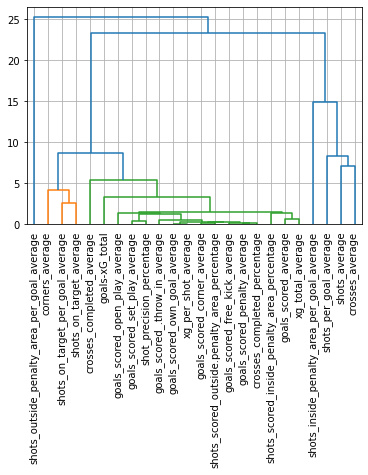

In [34]:
import scipy.cluster
import matplotlib.pyplot as plt

feature_clusters = scipy.cluster.hierarchy.linkage(similarity_matrix, method = 'single')
scipy.cluster.hierarchy.dendrogram(feature_clusters, labels = transposed_dataset.index.values, leaf_rotation = 90, color_threshold = 7) 
plt.grid(True)
plt.show()

We can also use complete-link strategy to compare with single-link, and decide in a better way:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



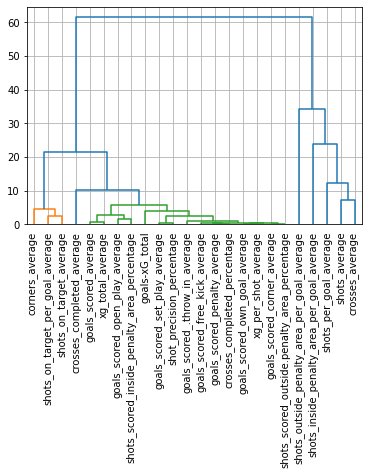

In [35]:
feature_clusters_complete = scipy.cluster.hierarchy.linkage(similarity_matrix, method = 'complete')
scipy.cluster.hierarchy.dendrogram(feature_clusters_complete, labels = transposed_dataset.index.values, leaf_rotation = 90, color_threshold = 7) 
plt.grid(True)
plt.show()

Both results are similar, although it is better to use single-link, mainly because we are isolating the outliers that we have, which should be considered for the feature selection. Also, it is interesting to interpret the dendrogram obtained with single link. 

As we can see, we have a clear outlier which is shots_outside_penalty_area_per_goal_average, which we already saw in the previous data visualization. Besides, we have 2 more big groups:

- The group associated to all the offensive features of the team that are really similar to each other in the data visualization (shots_on_target_average, goals-xG_total...).

- The group associated to those other "outliers" that we mentioned before, but that are not as different from each other as shots_outside_penalty_area_per_goal_average (which is the clear outlier that we have).

Which is the meaning of these groups that are identified by the hierarchical clustering? Well, if we look at the transposed dataset, we can see how there are some features that take really high values (group 2) and then we have some other features that take really low values, close to 0 in almost all cases (group 1). This is the meaning of the clusters detected by the algorithm. 

Moreover, it is also interesting to understand a relationship (from domain knowledge): some of these features of the second group (high values) could define really offensive teams (teams that shoot a lot, that shoot from the penalty area...), but it is important to also understand the quality of those offensive plays, because you can shoot a lot, but maybe that does not translate into a higher goal_average (which is in group 1) and so on.

We also need to decide the cut, in this case, we could create a cut from a value like 7. The reason behind this cut is that, we want to isolate the possible outliers (all the features that could be different from each other), we do not really want a high value, because that would lead to creating groups and removing features that we should not be removing. As a result, 7 could be an interesting cut to do:

In [36]:
feature_labels = scipy.cluster.hierarchy.fcluster(feature_clusters, 7, criterion = 'distance')
feature_labels

array([2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 5, 1, 6, 7, 2, 2, 1, 4, 2, 2, 1, 2,
       2, 2], dtype=int32)

Let's draw a graph that shows the groups of the different features that were performed (this will help to decide the final features):

In [37]:
fig = px.scatter(
    x = pca_features[:, 0],
    y = pca_features[:, 1],
    labels = {'x': 'PC1', 'y' : 'PC2'},
    color = feature_labels
)

for index, data in enumerate(pca_features):
  fig.add_annotation(x = data[0], y = data[1], text = transposed_dataset.index.values[index])

fig.show()

As we can see, we have 7 different groups of features. From each group, we should select between 1-2 features, so that the final amount of features is not too low and not too high. Our decision for the features selected comes from both domain knowledge and the correlation matrix (we try to select the features that are as much different as it is possible, while selecting the most "interesting" features from our point of view):

- Group 1: corners_average.
- Group 2: goals_scored_average, shots_scored_outside.penalty_area_percentage (we selected two because the group is really big).
- Group 3: shots_average (no more features in the group).
- Group 4: crosses_average (no more features in the group).
- Group 5: shots_per_goal_average (no more features in the group).
- Group 6: shots_inside_penalty_area_per_goal_average (no more features in the group).
- Group 7: shots_outside_penalty_area_per_goal_average (no more features in the group).

As a result, the dataset after performing the feature selection is the following one:

In [40]:
reduced_dataset = initial_dataset[['corners_average',
                                   'goals_scored_average',
                                   'shots_scored_outside.penalty_area_percentage',
                                   'shots_average',
                                   'crosses_average',
                                   'shots_per_goal_average',
                                   'shots_inside_penalty_area_per_goal_average',
                                   'shots_outside_penalty_area_per_goal_average']]
reduced_dataset = reduced_dataset.set_index(initial_dataset['team_name'], drop = True) 
reduced_dataset

,corners_average,goals_scored_average,shots_scored_outside.penalty_area_percentage,shots_average,crosses_average,shots_per_goal_average,shots_inside_penalty_area_per_goal_average,shots_outside_penalty_area_per_goal_average
team_name,,,,,,,,
Argentina,6.00,1.50,0.17,14.3,12.50,9.5,7.0,22
Australia,4.67,0.67,0.00,11.7,12.33,17.5,11.5,0
Belgium,5.71,2.29,0.06,15.3,10.43,6.7,4.5,39
Brazil,8.20,1.60,0.12,21.2,12.80,13.3,9.4,40
Colombia,3.25,1.50,0.17,9.8,12.75,6.5,4.0,19
Costa Rica,3.67,0.67,0.00,9.3,10.67,14.0,7.5,0
Croatia,5.51,2.00,0.07,17.0,19.14,8.5,5.0,54
Denmark,4.50,0.75,0.00,10.0,8.75,13.3,6.7,0
Egypt,2.00,0.67,0.50,9.7,12.00,14.5,15.0,14


# 3. Dimensionality Reduction

Up to now, we have performed feature subset selection on the initial dataset obtaining as a result a dataset with 24 columns (from the 69 original columns). Now it is time to apply PCA, that will allow us to obtain 2 objectives:

- Dimensionality reduction: the number of columns will be reduced.
- Data visualization: through a 2-dimensional diagram, where the different data points, in this case, countries, will be shown.

## 3.1. Data Normalization

However, before applying PCA we must normalize the data. The reason behind this is that we will be applying distance based algorithms with this data, such as clustering algorithms (K-Means, DBSCAN...). Therefore, we need the data to be normalized. There are several options for normalizing data, such as [MinMaxScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html), [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) or [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html). We will use StandardScaler, so that our resulting data has mean-0 and 1-standard deviation (normal distribution) and the normalized values will all be between 0 and 1. However, other options could also be correct here, but the values would be different e.g. [-1, 1] for MaxAbsScaler.

In [41]:
from sklearn import preprocessing

standard_scaler = preprocessing.StandardScaler()
normalized_dataset = standard_scaler.fit_transform(reduced_dataset)

## 3.2. Applying PCA

Once we have normalized the data, we can apply PCA:

In [42]:
from sklearn.decomposition import PCA

pca = PCA()
pca_dataset = pca.fit_transform(normalized_dataset)
pca_dataset.shape

(32, 8)

As we can see, after applying PCA, we got a dataset with the same number of rows and columns. Why did we apply PCA for then? In order to correctly apply PCA, we need to know the number of components that we need. No parameter was passed to _PCA()_, thus it used as many components as columns we have (24). 

In order to determine the number of components that we need, we can draw a graph that shows the cumulative explained variance of the different components. We will select a number of components that can explain a decent amount of variability (at least 80%).

In [43]:
px.area(
    x = range(1, 1 + pca_dataset.shape[1]),
    y = pca.explained_variance_ratio_.cumsum(),
    labels = {'x': 'Number of components', 'y' : 'Explained variance'}
)

If we take a look at the graph, we can choose a number of components equals to 3. The reason behind this, is that we want to choose the minimum number of components that can explain the maximum amount of variance in the dataset. A good value for explained variance could be around 80%, and choosing a number of components of 3 leads to explaining 88.21% of the variance, while not having a high amount of columns.

Let's now apply PCA with a number of components of 3:

In [44]:
pca = PCA(n_components = 3)
pca_dataset = pca.fit_transform(normalized_dataset)
pca_dataset.shape

(32, 3)

As we can see, by applying PCA with 3 components, the result is a dataset with 32 rows (unchanged) and 3 columns, which is much smaller than the 8 original columns. 

However, which is the meaning of these 3 columns? Applying the PCA algorithm allows us to reduce the columns to a small number of components. Each component is simply a linear combination of the initial columns, but they do not have any meaning, because they are only mathematical artifacts. We can show the weights of each of the components:

In [45]:
import numpy as np

weights_dataset = pd.DataFrame(np.matrix.transpose(pca.components_), columns = ['PC' + str(i) for i in range(1, 4)], index = reduced_dataset.columns)
weights_dataset

,PC1,PC2,PC3
corners_average,0.422259,0.255900,-0.251245
goals_scored_average,-0.110305,0.556954,-0.081895
shots_scored_outside.penalty_area_percentage,-0.010622,0.189927,0.846126
shots_average,0.468150,0.264032,-0.189400
crosses_average,0.473482,0.132215,0.110021
shots_per_goal_average,0.444239,-0.353747,-0.048189
shots_inside_penalty_area_per_goal_average,0.399853,-0.308755,0.373418
shots_outside_penalty_area_per_goal_average,0.094002,0.529703,0.156526


As we can see, the interpretation of the components is really hard, since they are only mathematical artifacts without meaning. But, we can extract some pieces of information:

- PC1: it is the hardest principal component to interpret, because it is related to lots of the features: average corners, average shots, average crosses, average shots per goal and average shots inside penalty area per goal.
- PC2: is mainly related to the average of goals scored and the average shots outside the penalty area per goal. 
- PC3 is mainly related to the percentage of shots scored outside penalty area.

## 3.3. Data visualization

A really good advantage of PCA is that not only it can be used to perform dimensionality reduction, but it can also be used to visualize data. As a result, it is worth creating a 2-dimensional graph to understand the data that we have in a better way:

In [46]:
fig = px.scatter(
    x = pca_dataset[:, 0],
    y = pca_dataset[:, 1],
    labels = {'x': 'PC1', 'y' : 'PC2'}
)

for index, data in enumerate(pca_dataset):
  fig.add_annotation(x = data[0], y = data[1], text = reduced_dataset.iloc[index].name)

fig.show()

As we can see from the graph, it looks like there are some teams whose way of attacking is really similar, for instance Nigeria, Costa Rica and Egypt are teams that, apparently, have similar data when it comes to their offense.

Additionally, from the graph we can also see:

- A group of similar teams like Uruguay, South Korea, Sweden...
- Another similar group of teams (bigger) like Denmark, Egypt, Nigeria, Morocco...
- Another similar group of teams (smaller) like Spain, Portugal, Argentina...

Also, we can see how there are pairs of teams which are similar:

- Panama and Iran: this makes sense from the domain knowledge point of view (both teams were defeated in the group stage, receiving lots of goals and scoring few or no goals at all).

- France and Russia: it is interesting to know why their offensive data is similar, because the performance of both teams was quite different: France won the tournament while Russia was not such a good team, although they did perform pretty well according to their expectations, as they reached quarter-finals (where they were defeated).

Also, there are some outliers that we should be able to detect when we apply DBSCAN (for outlier detection) such as Brazil and Germany.

On the other hand, we were curious about why France and Russia were so similar, therefore we decided to take the data associated to both countries and plot it. Surprisingly, they are quite alike in certain aspects. As it can be seen in the graph: both teams have a similar data, overall in the number of average shots, number of goals and goals-xG. This could give us information such as the fact that both teams attack in a similar way, or said in a different way: they have a similar playstyle when it comes to their offense.

Note: 11 is the index of France and 24 is the index of Russia.

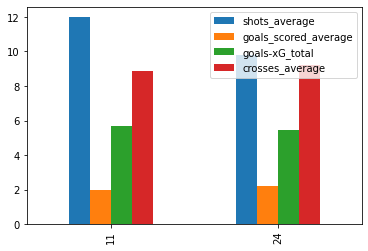

In [51]:
initial_dataset.loc[[11, 24]][['shots_average', 'goals_scored_average', 'goals-xG_total', 'crosses_average']].plot(kind = 'bar')

However, given this facts, there is one question that appears: Why were their results so different? Well, if we use a bit of domain knowledge, we have to remember our previous words: its high level of football, thus we assumed that, since most teams will probably deffend more or less correct, focusing on the offensive was the correct choice. And that is how we performed feature selection. However, it is most likely the defense what made France win and Russia lose. Let's take a look at this data: 

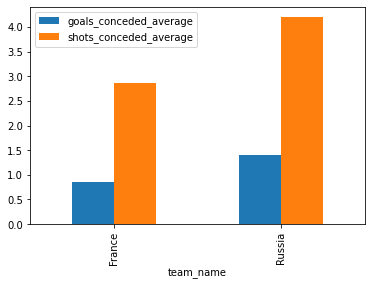

In [52]:
france_russia_def_data = initial_dataset[initial_dataset['team_name'] == 'France'].append(initial_dataset[initial_dataset['team_name'] == 'Russia'])
france_russia_def_data = france_russia_def_data.set_index(france_russia_def_data['team_name'], drop = True)
france_russia_def_data[['goals_conceded_average', 'shots_conceded_average']].plot(kind = 'bar')

As we can see, Russia does concede more shots on average, and they also concede more goals on average. This data is really critical, because France did play against really good teams (finals, semi-finals...) that Russia probably did not play, and still it does not matter, because the french defensive statatistics are better (even if they played more games and against better teams - because they did go to finals, seminals...). As we can see, in our data, it is true that they are alike, offensively, however, deffensively we can see how France was a winning team, while Russia was not that good.

# 4. Outlier detection with DBSCAN

Another important task to be considered before applying the clustering algorithms is the outlier detection. It is really important, because outliers could have a bad influence in the results of the clustering, as a result, we have to try to identify them, interpret why they are outliers, and make decisions related to them, such as removing them or not.

The basic idea that we are trying to implement is that, by making use of a density-based algorithm, we can not only extract the density areas (which would be related to clusters), but also we can now which points do not belong to these areas. Those data points will be the outliers that we are trying to detect.

## 4.1. DBSCAN Parametrization

First of all, we have to obtain the two parameters that DBSCAN needs:

- eps: also known as epsilon. It is the maximum distance for two points to be in the same neighbourhood.
- minPts: it is the minimum number of points in a neighbourhood so that a point can be considered core point.


In this case, we can assume a minPts = 3, because having 3 teams whose offensive features are similar, should be considered as a high density area (cluster)

In [53]:
minPts = 3

Also, we can show the similarity matrix. This matrix can give us a general idea on which teams could be outliers in our dataset, therefore, it can be quite convenient to calculate and show this matrix:

In [55]:
import sklearn.neighbors

distance_metric = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
similarity_matrix = distance_metric.pairwise(normalized_dataset)

px.imshow(similarity_matrix)

As we can see in this similarity matrix, there are differences in the offensive data of the teams. However, there is 1 team which is slightly different to the others: France. This country was, in fact, the winner of the tournament.

Now, we have to use this similarity matrix to calculate the best value of epsilon for a value of minPts = 3. Let's do that:

In [56]:
distances = []
distance_array = sklearn.neighbors.kneighbors_graph(normalized_dataset, minPts, include_self = 3).toarray()


for i in range(len(distance_array)):
  for j in range(len(distance_array)):
    if distance_array[i][j] != 0:
      distances.append(similarity_matrix[i][j])

distances.sort()

px.line(
    x = range(len(distances)),
    y = distances,
    labels = {'x': 'Distances', 'y' : 'Epsilon'}
)

According to the elbow rule, values between 1 and 2.6 could be considered to be good values for epsilon. Therefore, let's try with several possible values of epsilon and let's evaluate which could be the best value (we use step of 0.2 to reduce the amount of values to test):

In [57]:
from sklearn.cluster import DBSCAN
from tabulate import tabulate

results = []

for eps in np.arange(1.0, 2.6, 0.2):
  dbscan = DBSCAN(eps = eps, min_samples = minPts).fit(normalized_dataset)
  clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
  outliers = list(dbscan.labels_).count(-1)
  results.append([eps, clusters, outliers])

print(tabulate(results, headers = ['eps', 'num_clusters', 'num_outliers']))

  eps    num_clusters    num_outliers
-----  --------------  --------------
  1                 1              29
  1.2               2              20
  1.4               2              18
  1.6               2              13
  1.8               1               6
  2                 1               6
  2.2               1               4
  2.4               1               4


If we were interested in clustering, probably we would use values like 1.2, 1.4 or 1.6. However, since we are interested in outlier detection, we can choose either 1.8-2 (6 outliers) or 2.2-2.4 (4 outliers).

However, before choosing, it could be adequate to try to apply the exact same process, but in this case to the data obtained from pca, which has less columns. This could give us more information to make a better decision:

In [58]:
distancesPCA = []
distance_arrayPCA = sklearn.neighbors.kneighbors_graph(pca_dataset, minPts, include_self = 3).toarray()


for i in range(len(distance_array)):
  for j in range(len(distance_array)):
    if distance_array[i][j] != 0:
      distancesPCA.append(similarity_matrix[i][j])

distancesPCA.sort()

px.line(
    x = range(len(distancesPCA)),
    y = distancesPCA,
    labels = {'x': 'Distances', 'y' : 'Epsilon'}
)

In this case, let's choose again from 0.8 to 2.6 (in steps of 0.2) but using PCA:

In [59]:
results = []

for eps in np.arange(0.8, 2.6, 0.2):
  dbscan = DBSCAN(eps = eps, min_samples = minPts).fit(pca_dataset)
  clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
  outliers = list(dbscan.labels_).count(-1)
  results.append([eps, clusters, outliers])

print(tabulate(results, headers = ['eps', 'num_clusters', 'num_outliers']))

  eps    num_clusters    num_outliers
-----  --------------  --------------
  0.8               3              11
  1                 3              10
  1.2               3              10
  1.4               2               8
  1.6               1               6
  1.8               1               3
  2                 1               3
  2.2               1               3
  2.4               1               3


As we can see, the results that we obtain from this is more or less the same. We can confirm, using the results and also the domain knowledge, together with the previous visualization that there are more or less 3-6 outliers (a higher number is not that good, since there aren't many teams on the tournament, and data does not look so different in the previous graph). Therefore, using the data from pca and an epsilon of 1.6, let's determine which are the outliers:

In [62]:
dbscan = DBSCAN(eps = 1.6, min_samples = minPts).fit(pca_dataset)

chart = px.scatter(
    x = pca_dataset[:, 0],
    y = pca_dataset[:, 1],
    color = dbscan.labels_,
    labels = {'x': 'PC1', 'y' : 'PC2'}
)

for index, data in enumerate(pca_dataset):
  chart.add_annotation(x = data[0], y = data[1], text = str(reduced_dataset.iloc[index].name))

chart.show()

As we can see, the result of running DBSCAN for outlier detection leads to having 6 different teams as "outliers":

- Brazil
- Germany
- Croatia
- Egypt
- Belgium
- Serbia

However, if we look at the dataset, we can clearly see that Egypt is not that different from other countries, such as Costa Rica or Nigeria, i.e. their offensive data is alike. The same logic can be applied to Serbia, which is a country whose offensive data in this world cup 2018 is quite simlar to others like Mexico, Morocco (not exactly the same, but it is quite similar).

Moreover, Croatia and Belgium, although they could be considered as outliers, they are not as different as some other countries like Germany or Brazil, which are clear outliers and should be removed (their indexes, starting from 1, are 4 and 12, however, since we have a 0-start index in this dataframe, we will use indexes 3 and 11 to remove them).

As a result, our decision is to remove Brazil and Germany (they are clear outliers) while keeping the rest of detected outliers, because they are not so different from other countries. Let's obtain the new dataset:

In [77]:
pca_df = pd.DataFrame(pca_dataset)
dataset_no_outliers = pca_df.drop(index = [3, 11], axis = 0)
dataset_no_outliers

,0,1,2
0,0.380174,1.452229,-0.023763
1,0.731164,-1.710214,-0.457621
2,-0.301966,3.106052,-0.856896
4,-1.439148,0.968261,0.385958
5,-0.688779,-1.606004,-0.537253
6,1.261969,3.619806,-0.374102
7,-0.752478,-1.300159,-0.834700
8,-0.120912,-1.185278,3.446875
9,-0.389990,1.470811,-0.152491
10,-1.836157,1.300588,0.771696


As we can see, now we got a dataset of 3 columns (PCA was applied for dimensionality reduction) and 30 teams, because Brazil and Germany are removed with respect to the initial dataset. We can even visualize this new data:

In [78]:
chart = px.scatter(
    x = dataset_no_outliers.loc[:, 0],
    y = dataset_no_outliers.loc[:, 1],
    labels = {'x': 'PC1', 'y' : 'PC2'}
)

for index in dataset_no_outliers.index:
  chart.add_annotation(x = dataset_no_outliers[0][index], y = dataset_no_outliers[1][index], text = str(reduced_dataset.iloc[index].name))

chart.show()

As we can see, now the 2 outliers that were removed (Germany and Brazil) disappeared, as a consequence, we should have better data, which will allow us to get better results when it comes to the clustering algorithms.

[TEAM MAYBE INCLUDE LOCAL FACTOR FOR DETECTING OUTLIERS??]

# 5. Clustering by K-Means

# 6. Hierarchical clustering algorithm